# ResNet

- **Training set**: LO_SARD102
- **Test/Validation set:** LO_SARD102
- **Features**: word2vec sequence (100)
- **Class imbalance processing**: undersampling

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report

X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_undersample_X_train.npy', mmap_mode='r')
Y_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_undersample_Y_train.npy', mmap_mode='r')

X_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_val.npy', mmap_mode='r')
Y_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_val.npy', mmap_mode='r')

X_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_test.npy',  mmap_mode='r')
Y_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_test.npy',  mmap_mode='r')

print("Y_train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)

print("\nY_val:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)

print("\nY_test:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

train_gen = ResNetDataGenerator(_X=X_train, _y=Y_train, batch_size=512)
val_gen =   ResNetDataGenerator(_X=X_val,   _y=Y_val,   batch_size=512)
test_gen =  ResNetDataGenerator(_X=X_test,  _y=Y_test,  batch_size=512)

Y_train:
Counter({1.0: 3898, 0.0: 3898})
(7796, 100, 100)
(7796,)

Y_val:
Counter({0.0: 31975, 1.0: 1240})
(33215, 100, 100)
(33215,)

Y_test:
Counter({0.0: 31916, 1.0: 1299})
(33215, 100, 100)
(33215,)


## Build & train keras model

In [5]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(100, 100, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.95)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(train_gen,
                    epochs=32,
                    verbose=True,
                    validation_data=val_gen
                   )

Epoch 1/32
16/16 [==============================] - 17s 1s/step - loss: 2.2174 - accuracy: 0.7192 - val_loss: 2220330.5000 - val_accuracy: 0.0373
Epoch 2/32
16/16 [==============================] - 17s 1s/step - loss: 0.1937 - accuracy: 0.9282 - val_loss: 2774876.7500 - val_accuracy: 0.0373
Epoch 3/32
16/16 [==============================] - 17s 1s/step - loss: 0.0958 - accuracy: 0.9709 - val_loss: 747940.7500 - val_accuracy: 0.0373
Epoch 4/32
16/16 [==============================] - 17s 1s/step - loss: 0.0511 - accuracy: 0.9895 - val_loss: 134352.5156 - val_accuracy: 0.0373
Epoch 5/32
16/16 [==============================] - 17s 1s/step - loss: 0.0381 - accuracy: 0.9922 - val_loss: 30118.8809 - val_accuracy: 0.0373
Epoch 6/32
16/16 [==============================] - 17s 1s/step - loss: 0.0293 - accuracy: 0.9929 - val_loss: 8685.9346 - val_accuracy: 0.0374
Epoch 7/32
16/16 [==============================] - 17s 1s/step - loss: 0.0224 - accuracy: 0.9953 - val_loss: 2967.6069 - val_accur

## Evaluation

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31916
         1.0       0.95      0.99      0.97      1299

    accuracy                           1.00     33215
   macro avg       0.97      0.99      0.98     33215
weighted avg       1.00      1.00      1.00     33215

Confusion matrix:
[[31841    75]
 [   10  1289]]

Confusion matrix (Percentages):
[[9.5863e+01 2.2600e-01]
 [3.0000e-02 3.8810e+00]]

Metrics:
Sensitivity (TPR): 0.992302
Specifity (TNR):   0.997650

FPR: 0.002350
FNR: 0.007698

Balanced accuracy: 0.994976

Test loss:	0.025537
Test accuracy:	0.997441


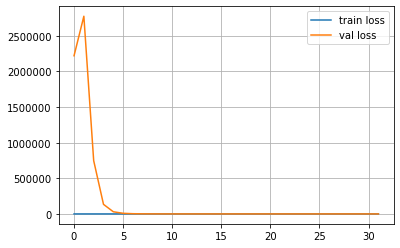

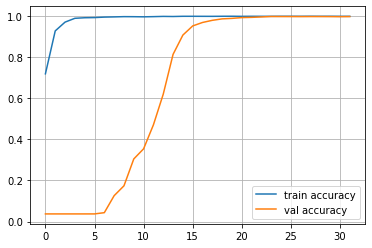

In [6]:
Y_pred = numpy.argmax( model.predict_generator(test_gen) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate(test_gen, verbose=False)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

In [8]:
model.save('ResNet_word2vec_undersample.h5')